# Análise exploratória de uma amostra de dados das notas de alguns filmes

## Analisando base de dados das notas

In [60]:
import pandas as pd
import numpy as np

In [61]:
notas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/ratings.csv")
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [62]:
notas.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [63]:
notas["userId"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [64]:
notas["rating"].value_counts()

,count
rating,
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791


<Axes: ylabel='Frequency'>

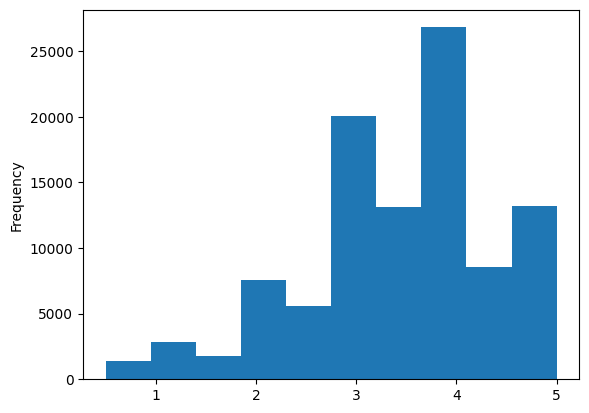

In [65]:
notas["rating"].plot(kind='hist')

A nota 5 apareceu aproximadamente 15 mil vezes. A nota 4 apareceu pouco mais de 25 mil vezes.

In [66]:
mediana = notas["rating"].median()
media = notas["rating"].mean()

print(f"Média: {media}")
print(f"Mediana: {mediana}")

Média: 3.501556983616962
Mediana: 3.5


In [67]:
notas["rating"].describe()

,rating
count,100836.000000
mean,3.501557
std,1.042529
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


In [68]:
import seaborn as sns

<Axes: ylabel='rating'>

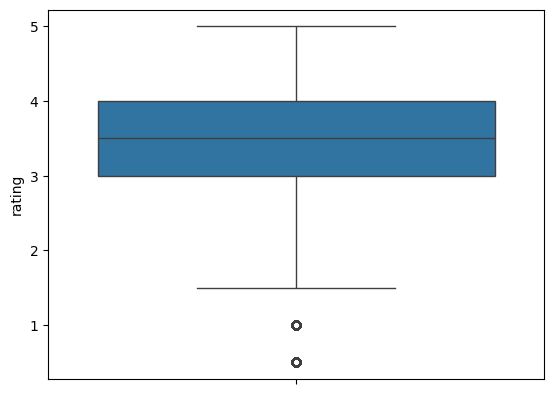

In [69]:
sns.boxplot(notas["rating"])

Esse boxplot mostra para nós que a mediana está no 3,5 por meio do traço horizontal ao centro da caixa azul.

O boxplot padrão do Seaborn representa, na borda superior da caixa, acima da linha da mediana, 25% dos valores que estão acima da mediana e 25% que estão abaixo dela. Ou seja, 50% das notas está entre 3 e 4.

Isso quer dizer que a maioria das pessoas dá notas entre 3 e 4. Para dar uma nota muito baixa, o filme precisa ser muito ruim; para dar nota muito alta, o filme precisa ser ótimo! Então, a maior parte das notas que damos fica entre 3 e 4, se as notas são de 0 a 5.

A linha vertical que atravessa o boxplot, também chamada de "bigodes", são os outros quase 25% dos dados, tanto acima da caixa quanto abaixo, completando 100%.

Nessa versão padrão do boxplot do Seaborn, os pontos soltos são os outliers, ou seja, os dados que fogem muito da distribuição da amostra. Ambas as notas outliers estão abaixo de 1,5.

## Merge com o nome e genêro do filme

In [70]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/movies.csv")
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [71]:
#merge entre notas e filmes
notas_filmes = notas.merge(filmes, on="movieId")
notas_filmes.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [72]:
medias_filmes = notas_filmes.groupby("title")["rating"].mean()
medias_filmes.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


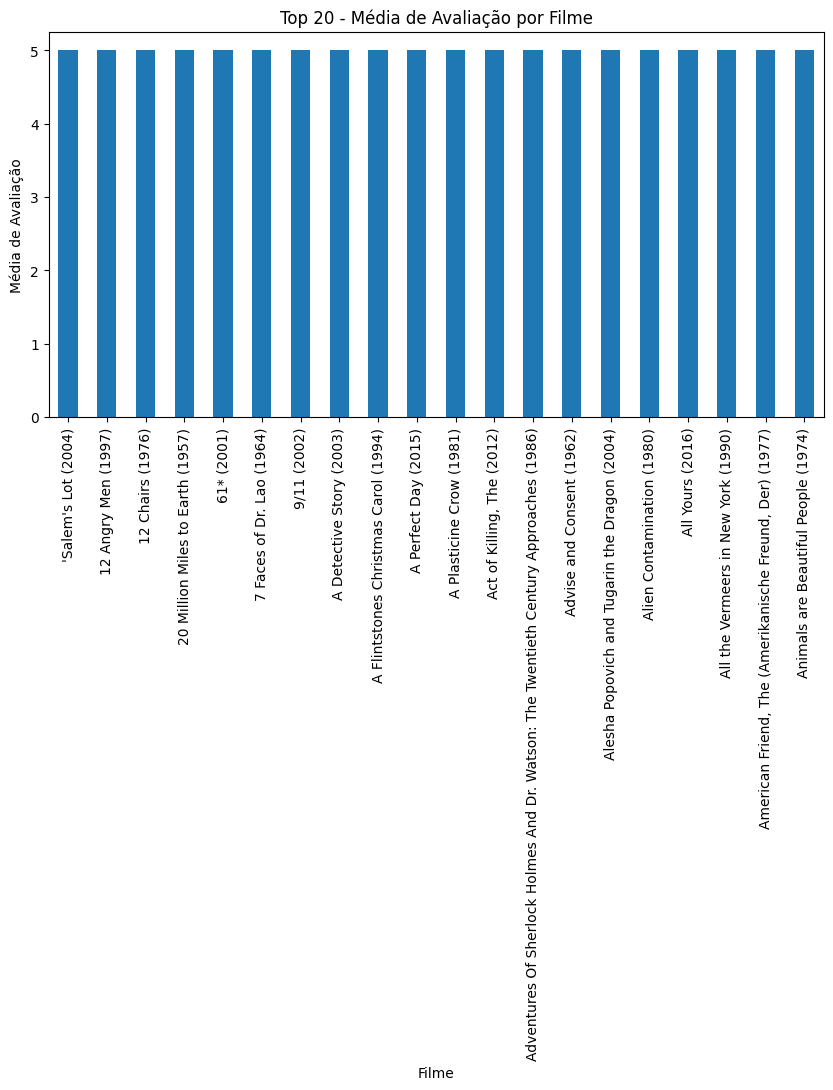

In [73]:
import matplotlib.pyplot as plt

#20 primeiros com as maiores médias
top_20_medias = medias_filmes.nlargest(20)

plt.figure(figsize=(10, 5))  #ajustando os valores de figsize
top_20_medias.plot(kind='bar')
plt.title("Top 20 - Média de Avaliação por Filme")
plt.xlabel("Filme")
plt.ylabel("Média de Avaliação")
plt.xticks(rotation=90)
plt.show()

## Merge com mais variáveis em relação aos filmes

In [74]:
tmdb = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


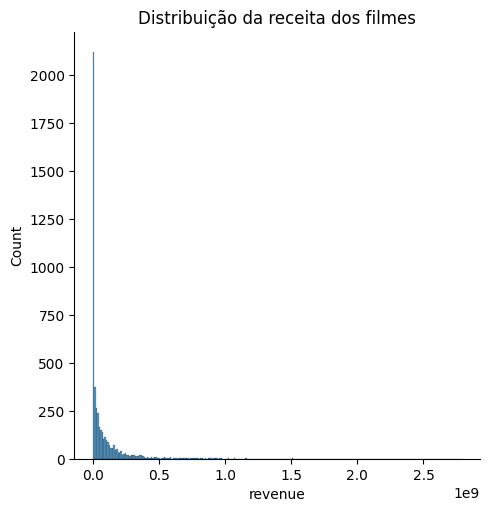

In [75]:
sns.displot(tmdb["revenue"])
plt.title("Distribuição da receita dos filmes")
plt.show()

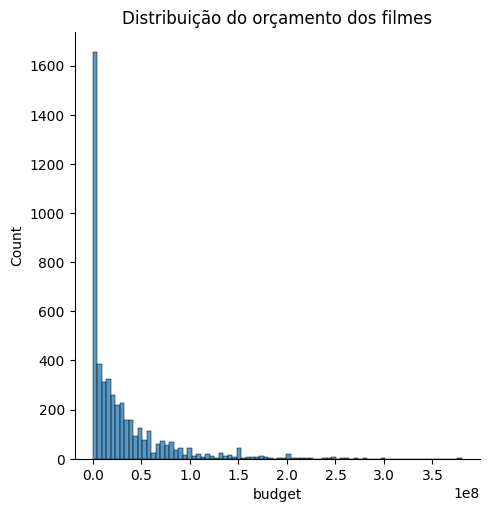

In [76]:
sns.displot(tmdb["budget"])
plt.title("Distribuição do orçamento dos filmes")
plt.show()

In [77]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

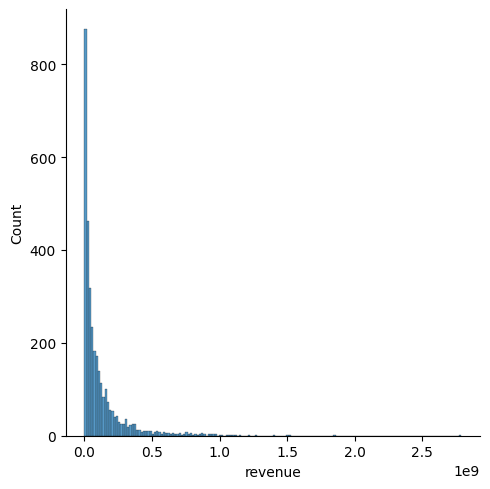

In [78]:
#com faturamento
com_faturamento = tmdb.query("revenue > 0")
sns.displot(com_faturamento["revenue"])

In [79]:
tmdb["original_language"].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [80]:
tmdb["original_language"].value_counts()

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


In [81]:
tmdb["original_language"].value_counts().index
tmdb["original_language"].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [82]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='total'>

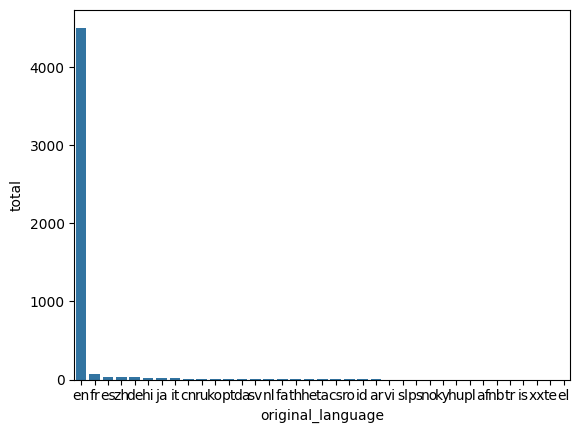

In [83]:
sns.barplot(x="original_language", y = "total", data = contagem_de_lingua)

<Axes: xlabel='original_language', ylabel='count'>

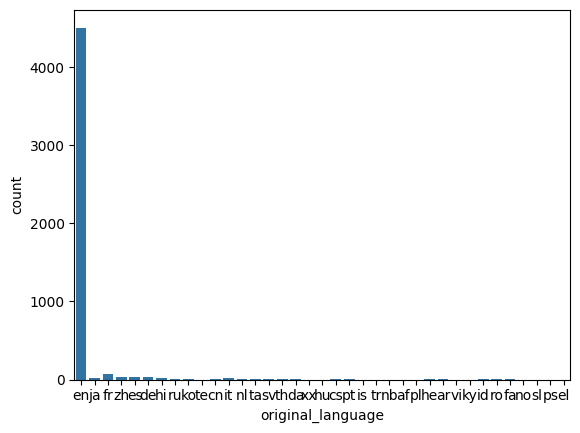

In [84]:
sns.countplot(data=tmdb, x="original_language")

In [85]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_geral, total_de_ingles, total_do_resto)

4803 4505 298


In [86]:
dados = {
  "lingua" : ["ingles", "outros"],
  "total" : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


<Axes: xlabel='lingua', ylabel='total'>

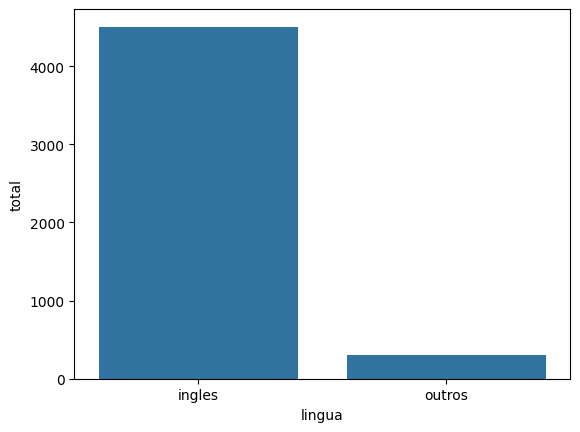

In [87]:
sns.barplot(x="lingua", y="total", data = dados)

## Refinando os visuais

In [88]:
total_de_outros_filmes_por_lingua = tmdb.query("original_language != 'en'")["original_language"].value_counts()
total_de_outros_filmes_por_lingua.head()

,count
original_language,
fr,70
es,32
zh,27
de,27
hi,19


<Axes: xlabel='original_language', ylabel='count'>

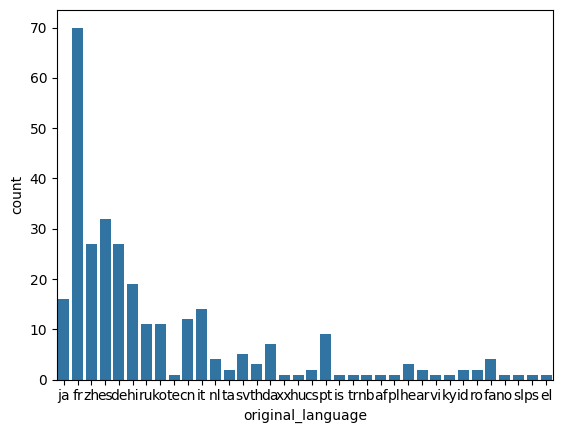

In [89]:
sns.countplot(data=tmdb.query("original_language != 'en'"), x="original_language")

<Axes: xlabel='original_language', ylabel='count'>

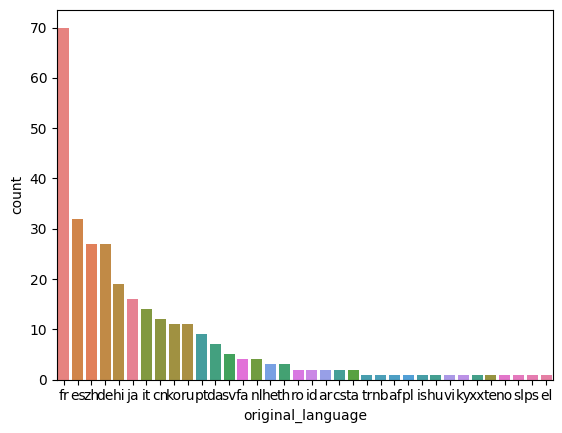

In [90]:
sns.countplot(data=tmdb.query("original_language != 'en'"),
              order=total_de_outros_filmes_por_lingua.index,
              hue="original_language",
              x="original_language")

<Axes: xlabel='original_language', ylabel='count'>

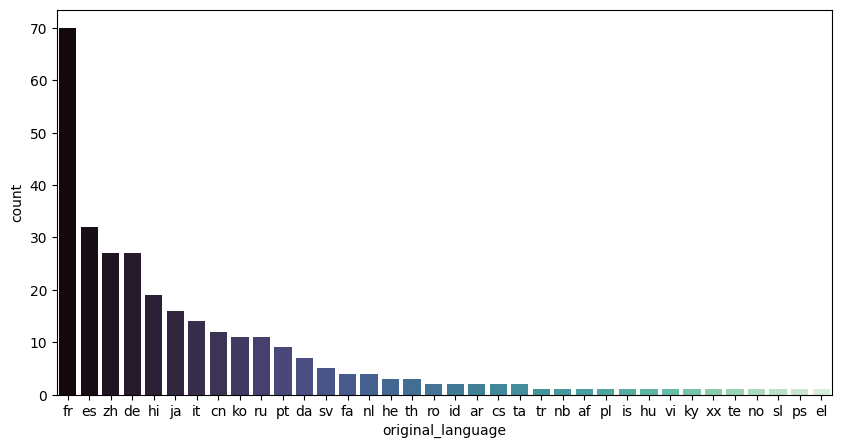

In [91]:
plt.figure(figsize=(10, 5))
sns.countplot(data=tmdb.query("original_language != 'en'"),
              order=total_de_outros_filmes_por_lingua.index,
              palette="mako",
              hue="original_language",
              hue_order=total_de_outros_filmes_por_lingua.index,
              x="original_language")

## Estatística dos Dados

In [94]:
notas_do_toy_story = notas.query("movieId==1")["rating"]
notas_do_jumanji = notas.query("movieId==2")["rating"]

media_do_toy_story = notas_do_toy_story.mean()
media_do_jumanji = notas_do_jumanji.mean()

print(media_do_toy_story, media_do_jumanji)

3.9209302325581397 3.4318181818181817


In [95]:
mediana_do_toy_story = notas_do_toy_story.median()
mediana_do_jumanji = notas_do_jumanji.median()

print(f"Média do Toy Story {media_do_toy_story}")
print("Mediana do Toy Story {mediana_do_toy_story }" )
print(f"Média do Jumanji {media_do_jumanji }")
print("Mediana do Jumanji {mediana_do_jumanji }" )

Média do Toy Story 3.9209302325581397
Mediana do Toy Story {mediana_do_toy_story }
Média do Jumanji 3.4318181818181817
Mediana do Jumanji {mediana_do_jumanji }


In [100]:
media_do_toy_story = np.mean(notas_do_toy_story)
mediana_do_toy_story = np.median(notas_do_toy_story)

media_do_jumanji = np.mean(notas_do_jumanji)
mediana_do_jumanji = np.median(notas_do_jumanji)

print("Toy Story:")
print("Média:", media_do_toy_story)
print("Mediana:", mediana_do_toy_story)

print("Jumanji:")
print("Média:", media_do_jumanji)
print("Mediana:", mediana_do_jumanji)

Toy Story:
Média: 3.9209302325581397
Mediana: 4.0
Jumanji:
Média: 3.4318181818181817
Mediana: 3.5


{'whiskers': [<matplotlib.lines.Line2D at 0x79aa5213a740>,
 'caps': [<matplotlib.lines.Line2D at 0x79aa5213b1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79aa5213a080>,
 'medians': [<matplotlib.lines.Line2D at 0x79aa5213bc70>,
 'fliers': [<matplotlib.lines.Line2D at 0x79aa52138280>,
 'means': []}

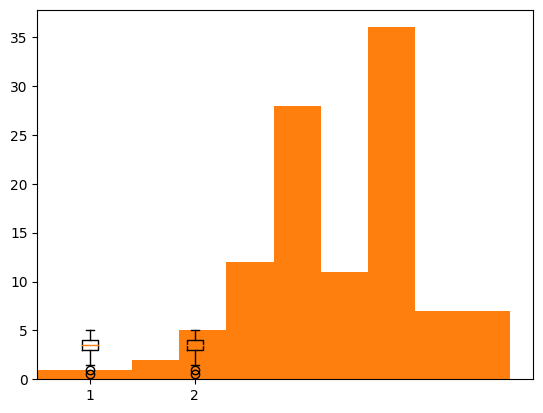

In [101]:
plt.hist(notas_do_jumanji)
plt.hist(notas_do_jumanji)

plt.boxplot([notas_do_jumanji, notas_do_jumanji])

{'whiskers': [<matplotlib.lines.Line2D at 0x79aa50fd2e30>,
 'caps': [<matplotlib.lines.Line2D at 0x79aa50fd3250>,
 'boxes': [<matplotlib.lines.Line2D at 0x79aa59d24a00>,
 'medians': [<matplotlib.lines.Line2D at 0x79aa50fd3b50>,
 'fliers': [<matplotlib.lines.Line2D at 0x79aa50fd3130>,
 'means': []}

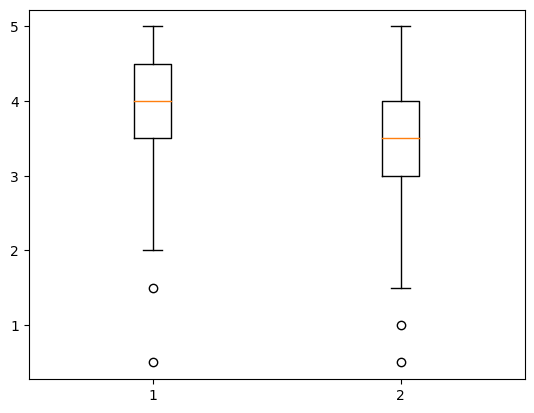

In [102]:
plt.boxplot([notas_do_toy_story, notas_do_jumanji])

<Axes: xlabel='movieId', ylabel='rating'>

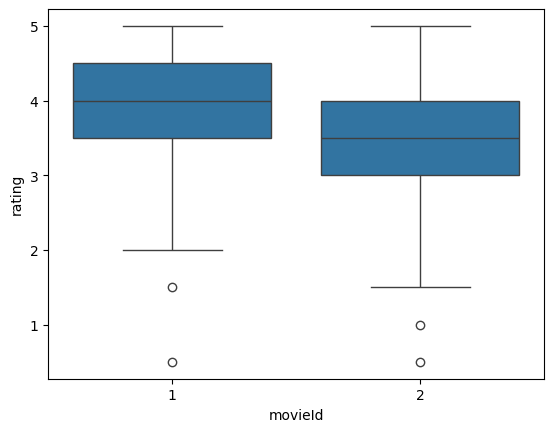

In [106]:
sns.boxplot(data=notas.query("movieId in [1,2]"), x="movieId",  y="rating")